Question 3. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


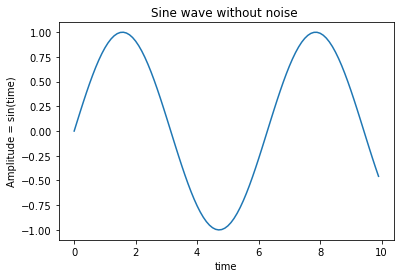

In [42]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)


# plot 
plt.plot(x, y)
plt.title('Sine wave')
plt.ylabel('Amplitude = sin(time)')
plt.xlabel('time')
plt.title('Sine wave without noise ')
plt.show()

In [7]:
noise = np.random.normal(0,1,100)

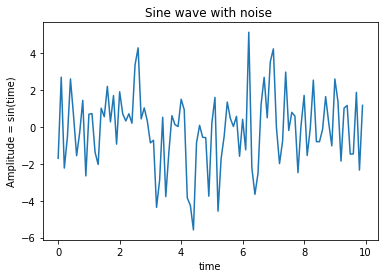

In [41]:
y = y + noise

# plot 
plt.plot(x, y)
plt.title('Sine wave')
plt.ylabel('Amplitude = sin(time)')
plt.xlabel('time')
plt.title('Sine wave with noise ')
plt.show()

In [36]:
def gkern(x_i , x_j, sig=1.):
    """\
    creates gaussian kernel  sigma of `sig`
    """
    kernel = np.exp(-0.5 * x_i * x_j / np.square(sig))
    
    return kernel 



In [37]:
K = np.zeros((len(x), len(x)))

for i in range(len(x)):
    for j in range(len(x)):
        K[i][j] = gkern(x[i], x[j])


In [38]:
lamda = 1
alpha = np.dot(np.linalg.inv(np.dot(K, K.T) + lamda * np.eye(len(x))), np.dot(K, y.T))

In [39]:
def f_star(data, alpha, x):
    
    pred = 0
    for i in range(len(alpha)):
        pred = pred + alpha[i] * gkern(data, x[i])
        
    return pred 



In [32]:
pred = []
for i  in range(len(x)):
    pred.append(f_star(x[i], alpha, x))


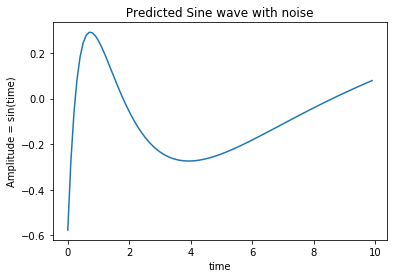

In [43]:
# plot 
plt.plot(x, pred)
plt.title('Sine wave')
plt.ylabel('Amplitude = sin(time)')
plt.xlabel('time')
plt.title(' Predicted Sine wave with noise ')
plt.show()

Question 4.

Top {k} eigen values: [2.93035378 0.92740362]
Top {k} eigen vectors: [ 0.52237162 -0.26335492  0.58125401  0.56561105] [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
Projection matrix is:  [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


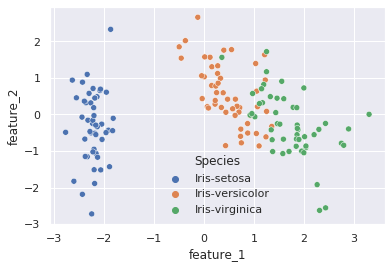

Plot of principal components estimated using scikit-learn


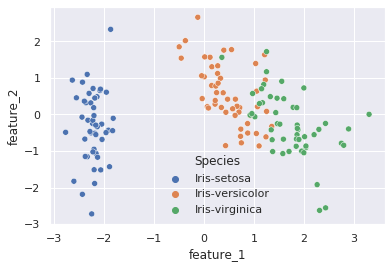

In [72]:
# Basic packages
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Scikit-learn package
from sklearn.preprocessing import StandardScaler

# Import data (IRIS DATAset)
dataset = pd.read_csv('https://raw.githubusercontent.com/debanga/depurr/master/datasets/Iris.csv').drop(columns=['Id'])


# Generate X and y
X = dataset.drop(columns=['Species'])
y = dataset['Species']

# Standardization
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X = X.rename(columns={0:'SepalLengthCm',1:'SepalWidthCm',2:'PetalLengthCm',3:'PetalWidthCm'})

# Singular Value Decoposition X = U S Vᵀ, where V will be out eigen  vector matrix (principal components)
u,s,v = np.linalg.svd(X)

# Estimate singular values
singular_values = s*s/(X.shape[0]-1)

# Top k=2 singular values and corresponding eigenvectors 
# we are reducinmg dimension to 2 (2 largest singular values))
k = 2
print("Top {k} eigen values:",singular_values[:k])
print("Top {k} eigen vectors:", v.T[:,0], v.T[:,1])
print('Projection matrix is: ',v.T[:,:2])


# Data in reduced dimension
X_reduced = np.matmul(np.array(X),v.T[:,:2])
pd.DataFrame(X_reduced)

# Visualize the samples in reduced space
dataset_new = pd.concat([pd.DataFrame(X_reduced),pd.DataFrame(dataset['Species'])], axis=1)
dataset_new = dataset_new.rename(columns={0:"feature_1",1:"feature_2"})
ax = sns.scatterplot(x="feature_1", y="feature_2", hue="Species", data=dataset_new)
plt.show()
print('Plot of principal components estimated using scikit-learn')
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced_scikit = pca.fit_transform(X)
dataset_new_scikit = pd.concat([pd.DataFrame(X_reduced_scikit),pd.DataFrame(dataset['Species'])], axis=1)
dataset_new_scikit = dataset_new.rename(columns={0:"feature_1",1:"feature_2"})
ax = sns.scatterplot(x="feature_1", y="feature_2", hue="Species", data=dataset_new_scikit)
plt.show()

KERNEL PCA 

In [79]:
# kernel definition 

def exp( x, y):
        """
        k(x, y) = exp(- ||x-y|| / (2 * sigma^2) )
        Hiperparámetros: sigma
        """
        sigma = 1
        return np.exp(- (1/ (2*sigma**2)) * np.linalg.norm(x-y))
    

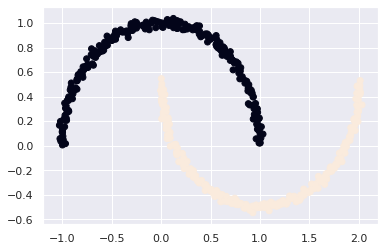

In [80]:
#Dataset generation
  
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)
  
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


In [81]:
K = np.zeros((500, 500))

for i in range(500):
    for j in range(500):
        K[i][j] = exp(X[i], X[j])
        

In [82]:
# Singular Value Decoposition X = U S Vᵀ, where V will be out eigen  vector matrix (principal components)
u,s,v = np.linalg.svd(K)

# Estimate singular values
singular_values = s*s/(X.shape[0]-1)

# Top k=2 singular values and corresponding eigenvectors 
# we are reducinmg dimension to 2 (2 largest singular values))
k = 2
print("Top {k} eigen values:",singular_values[:k])
print("Top {k} eigen vectors:", v.T[:,0], v.T[:,1])
print('Projection matrix is: ',v.T[:,:2])



Top {k} eigen values: [165.41712104  10.46220471]
Top {k} eigen vectors: [-0.04490873 -0.0376021  -0.04906992 -0.04270328 -0.04470064 -0.03643398
 -0.0443621  -0.04787324 -0.04720082 -0.04849855 -0.0467851  -0.04054119
 -0.03888873 -0.04036355 -0.03847398 -0.04921478 -0.03952636 -0.04014817
 -0.03586144 -0.04915042 -0.04874647 -0.04595106 -0.0448787  -0.0367445
 -0.04290807 -0.04859343 -0.03691822 -0.0478819  -0.04856317 -0.04909144
 -0.04349876 -0.03626547 -0.04925024 -0.04313365 -0.03744452 -0.04689117
 -0.03702175 -0.0399726  -0.04703394 -0.04892684 -0.0361638  -0.04071098
 -0.04888618 -0.03783415 -0.04101714 -0.04909515 -0.04894715 -0.04888182
 -0.04904066 -0.04496488 -0.0457628  -0.03670623 -0.04939097 -0.04782451
 -0.04784836 -0.04766599 -0.0482296  -0.04031226 -0.04936218 -0.049226
 -0.04724201 -0.04906131 -0.049132   -0.03911968 -0.04552776 -0.04740894
 -0.04644021 -0.03706316 -0.03993719 -0.04677848 -0.04764397 -0.04064292
 -0.04692175 -0.04898541 -0.04858491 -0.04910238 -0.04

In [90]:
# Data in reduced dimension
V= v.T[:,:2]

X_reduced = np.matmul(np.array(X),V.T)


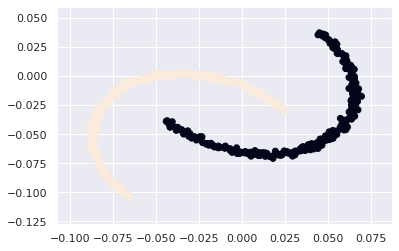

In [92]:
# plot in using kernel PCA 
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y)
plt.show()
